In [7]:
import time
import pandas as pd
import random
import networkx as nx
import numpy as np
import cstrees.cstree as ct
import cstrees.scoring as sc
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


stage
[1, {0, 1}, {0, 1}, {0, 1}]
-6644214454873602895
Creating tree on the fly on sampling.
adding edges [((), (0,)), ((), (1,))]
adding edges [((0,), (0, 0)), ((0,), (0, 1))]
adding edges [((0, 0), (0, 0, 0)), ((0, 0), (0, 0, 1))]
adding edges [((0, 0, 0), (0, 0, 0, 0)), ((0, 0, 0), (0, 0, 0, 1))]
adding edges [((0, 0, 0, 0), (0, 0, 0, 0, 0)), ((0, 0, 0, 0), (0, 0, 0, 0, 1))]
adding edges [((0, 1), (0, 1, 0)), ((0, 1), (0, 1, 1))]
adding edges [((0, 1, 0), (0, 1, 0, 0)), ((0, 1, 0), (0, 1, 0, 1))]
adding edges [((0, 1, 0, 0), (0, 1, 0, 0, 0)), ((0, 1, 0, 0), (0, 1, 0, 0, 1))]
adding edges [((0, 1, 0, 1), (0, 1, 0, 1, 0)), ((0, 1, 0, 1), (0, 1, 0, 1, 1))]
adding edges [((0, 1, 1), (0, 1, 1, 0)), ((0, 1, 1), (0, 1, 1, 1))]
adding edges [((0, 1, 1, 1), (0, 1, 1, 1, 0)), ((0, 1, 1, 1), (0, 1, 1, 1, 1))]
adding edges [((1,), (1, 0)), ((1,), (1, 1))]
adding edges [((1, 1), (1, 1, 0)), ((1, 1), (1, 1, 1))]
adding edges [((1, 1, 1), (1, 1, 1, 0)), ((1, 1, 1), (1, 1, 1, 1))]
adding edges [((1

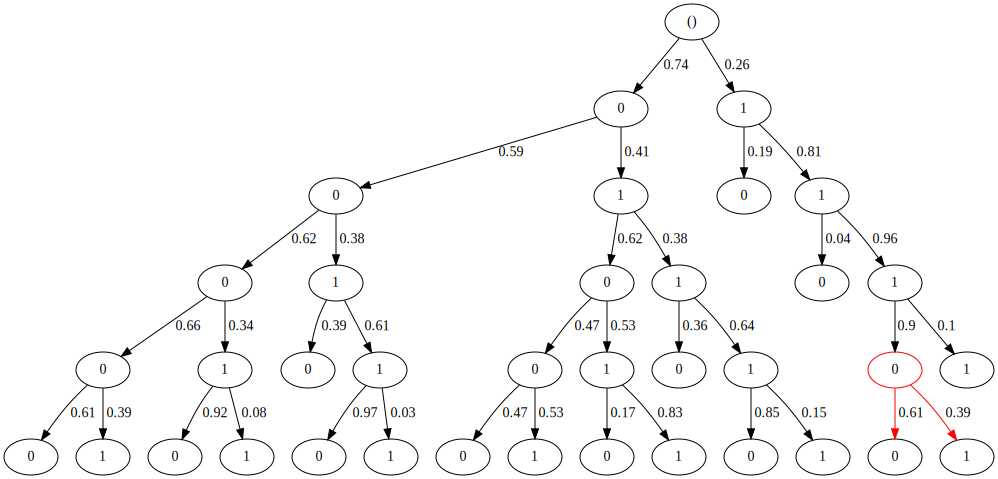

In [63]:
import numpy as np
#np.random.seed()
p = 5
co = ct.CausalOrder(range(p))
tree = ct.CStree(co)
cards = [2] * p
tree.set_cardinalities(cards)

stage = ct.sample_random_stage(cards, level=3, max_contextvars=3, prob=0.5)
stage.set_random_params(cards)

stage.color = "red"
print("stage")
print(stage)
print(hash(stage))

tree.set_stages({3: [stage]})  # should it have to be l
x = tree.sample(10)
print(x)

a = tree.plot()
a


In [66]:
x
s = sc.score(tree, x, alpha_tot=1.0, method="K2")
s

stage counts: 10
-28.80005792917908
stage counts: 8
stage counts: 2
-21.86598534187957
stage counts: 5
stage counts: 3
stage counts: 2
-16.113412703053935
stage counts: 4
stage counts: 2
stage counts: 1
stage counts: 2
stage counts: 1
-12.242211692146046
stage counts: 3
stage counts: 1
stage counts: 1
stage counts: 1
stage counts: 2
stage counts: 1
stage counts: 1
-9.821843563495618


-88.84351122975424

In [69]:
cdags = tree.to_minimal_context_graphs()
print(cdags)
for key, graph in cdags.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw("minl_cont_dag_"+str(key) + ".png",
                args="-Glabel="+str(key)+"    ")


{0: [], 1: [], 2: [], 3: [<cstrees.cstree.Stage object at 0x7f75b4382070>], 4: []}
rels
{0: [], 1: [], 2: [], 3: [<cstrees.cstree.CSI_relation object at 0x7f75af427520>], 4: []}
X0, X1, X3 ⊥  X4, X2=1
paired_csis
[{}, {}, {}, {(0, 4): [[None, {0, 1}, {1}, {0, 1}, None]], (1, 4): [[{0, 1}, None, {1}, {0, 1}, None]], (3, 4): [[{0, 1}, {0, 1}, {1}, None, None]]}, {}]
minl cslisist
[{}, {}, {}, {(0, 4): [[None, {0, 1}, {1}, {0, 1}, None]], (1, 4): [[{0, 1}, None, {1}, {0, 1}, None]], (3, 4): [[{0, 1}, {0, 1}, {1}, None, None]]}]
get minl csis
[{}, {}, {}, {(0, 4): [[None, {0, 1}, {1}, {0, 1}, None]], (1, 4): [[{0, 1}, None, {1}, {0, 1}, None]], (3, 4): [[{0, 1}, {0, 1}, {1}, None, None]]}]
{}
{}
{}
{(0, 4): [[None, {0, 1}, {1}, {0, 1}, None]], (1, 4): [[{0, 1}, None, {1}, {0, 1}, None]], (3, 4): [[{0, 1}, {0, 1}, {1}, None, None]]}
(0, 4) [[None, {0, 1}, {1}, {0, 1}, None]]
(1, 4) [[{0, 1}, None, {1}, {0, 1}, None]]
(3, 4) [[{0, 1}, {0, 1}, {1}, None, None]]
minimal csis
{<cstrees.cstree.C

In [ ]:
x = tree.sample(10)
print(x)
a = tree.plot()
a


In [6]:
a = [1,2,3,4]
a[:-1]

[1, 2, 3]

In [10]:

seed=10
np.random.seed(seed)#9
random.seed(seed)

p = 5
cards = [2] * p
t = ct.sample_cstree(cards, 2, 0.9, 0.5)

np.random.seed(seed)  # 9
random.seed(seed)

t.set_random_stage_parameters()

ns = 0
for l, sl in t.stages.items():
    for s in sl:
        ns += 1
        print(s)
print(ns)
# t.sample(5)

df = t.to_df()
df.to_csv("test.csv", index=False)
# t.plot()


[{0, 1}, 0]
[1, 1, {0, 1}]
[1, 0, {0, 1}]
[{0, 1}, 0, 1, {0, 1}]
[{0, 1}, 1, 0, {0, 1}]
5


In [35]:
cdags = t.to_minimal_context_graphs()


rels
X0 ⊥  X2, X1=0
X2 ⊥  X3, X0=1, X1=1
X2 ⊥  X3, X0=1, X1=0
X0, X3 ⊥  X4, X1=0, X2=1
X0, X3 ⊥  X4, X1=1, X2=0
[{}, {(0, 2): [[None, {0}, None]]}, {(2, 3): [[{1}, {1}, None, None], [{1}, {0}, None, None]]}, {(0, 4): [[None, {0}, {1}, {0, 1}, None], [None, {1}, {0}, {0, 1}, None]], (3, 4): [[{0, 1}, {0}, {1}, None, None], [{0, 1}, {1}, {0}, None, None]]}, {}]
minl cslisist
[{}, {(0, 2): [[None, {0}, None]]}, {(2, 3): [[{1}, {0, 1}, None, None]]}, {(0, 4): [[None, {0}, {1}, {0, 1}, None], [None, {1}, {0}, {0, 1}, None]], (3, 4): [[{0, 1}, {0}, {1}, None, None], [{0, 1}, {1}, {0}, None, None]]}]
get minl csis
[{}, {(0, 2): [[None, {0}, None]]}, {(2, 3): [[{1}, {0, 1}, None, None]]}, {(0, 4): [[None, {0}, {1}, {0, 1}, None], [None, {1}, {0}, {0, 1}, None]], (3, 4): [[{0, 1}, {0}, {1}, None, None], [{0, 1}, {1}, {0}, None, None]]}]
{}
{(0, 2): [[None, {0}, None]]}
(0, 2) [[None, {0}, None]]
{(2, 3): [[{1}, {0, 1}, None, None]]}
(2, 3) [[{1}, {0, 1}, None, None]]
{(0, 4): [[None, {0}, {1}, 

In [36]:

for key, graph in cdags.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    # , args="-Glabel="+str(key)+"    ")
    agraph.draw("figures/minl_cont_dag_"+str(key) + ".png")


In [ ]:
import logging
import sys
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

seed = 1
np.random.seed(seed)  # 9
random.seed(seed)
ps = range(15, 25, 5)
maxs = range(1, 4)

df = pd.DataFrame(columns=["p", "contvars", "time"])

for m in maxs:
    print(m)
    for p in ps:
        sample_times = []
        to_mindag_times = []
        print(p)
        start = time.perf_counter()
        print("Sample tree")
        t = ct.sample_cstree(p, max_contextvars=m, prob=1)
        t.set_random_stage_parameters()
        stop = time.perf_counter()
        sample_times.append(stop - start)
        start = time.perf_counter()
        print("Minl dags")
        cdags = t.to_minimal_context_graphs()
        stop = time.perf_counter()

        tmp = pd.DataFrame({"p": [p], "contvars": [m], "time": [stop-start]})

        df = pd.concat([df, tmp])
        to_mindag_times.append(stop - start)

        print(stop-start)


print(df)


In [ ]:
df


In [ ]:
df = pd.read_csv("test.csv", header=[0, 1])

tt = ct.df_to_cstree(df)
np.random.seed(seed)  # 9
random.seed(seed)

tt.set_random_stage_parameters()
for l, sl in tt.stages.items():
    for s in sl:
        ns += 1
        print(s)
tt.sample(5)
tt.plot()


In [ ]:
t.sample(5)
a = t.plot()
a


In [ ]:
csis = t.csi_relations()
for key, val in csis.items():
    print("Context: {}".format(key))
    for v in val:
        print()
        print(v.ci)
        print("From decomposition:")
        for x in ct.decomposition(v.ci):
            print(str(x))
        print("From weak union:")
        for x in ct.weak_union(v.ci):
            print(str(x))
    print("")


In [ ]:
co = t.co
adjmats = ct.csi_relations_to_dags(csis, co)
graphs = [(key, graph) for key, graph in adjmats.items()]


In [39]:
p = 10

t = ct.sample_cstree(p, max_contextvars=3,
                     prob_contextvar=1, frac_stages_per_level=0.1)

print(t)


DEBUG:root:Max # stages with 1 context variables: 2
DEBUG:root:Trying to add max of 1 stages
DEBUG:root:Added 1 stages
DEBUG:root:Max # stages with 2 context variables: 4
DEBUG:root:Trying to add max of 1 stages
DEBUG:root:Added 1 stages
DEBUG:root:Max # stages with 3 context variables: 8
DEBUG:root:Trying to add max of 1 stages
DEBUG:root:Added 1 stages
DEBUG:root:Max # stages with 3 context variables: 32
DEBUG:root:Trying to add max of 4 stages
DEBUG:root:Added 4 stages
DEBUG:root:Max # stages with 3 context variables: 80
DEBUG:root:Trying to add max of 8 stages


KeyboardInterrupt: 